In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing observations in the data.

#**Exploratory Data Analysis**


**Distribution of Bmi (Body Mass Index)**


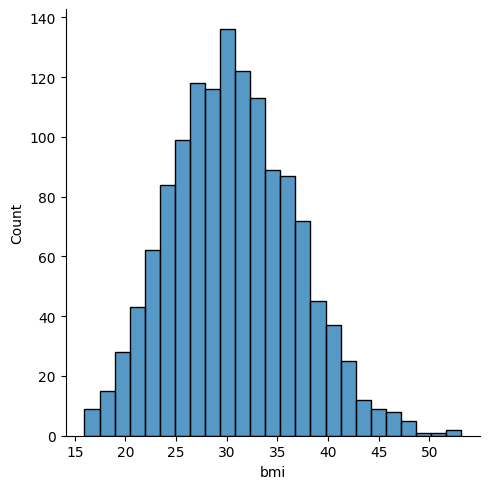

In [10]:
sns.displot(data, x="bmi")

We observe that the variable is normally distributed.

**Relationship between “smoker” and “charges"**

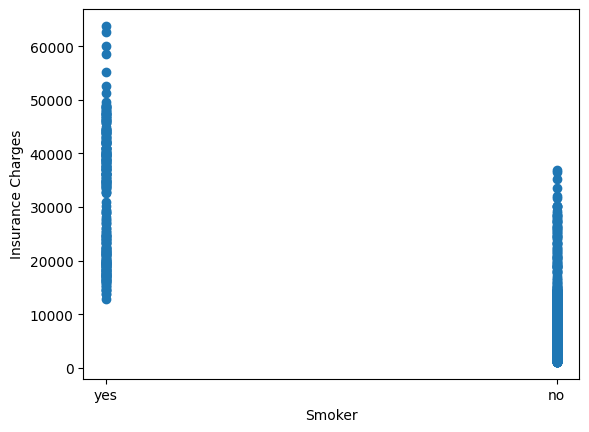

In [11]:
plt.scatter(x=data['smoker'], y=data["charges"])
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

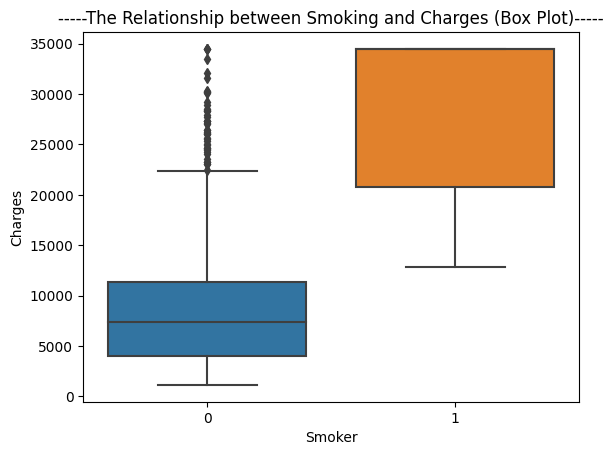

In [41]:
sns.boxplot(x="smoker", y="charges", data=data)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('-----The Relationship between Smoking and Charges (Box Plot)-----')
plt.show()

We see that smokers have higher health costs than non-smokers.

**Relationship between “smoker” and “region”**

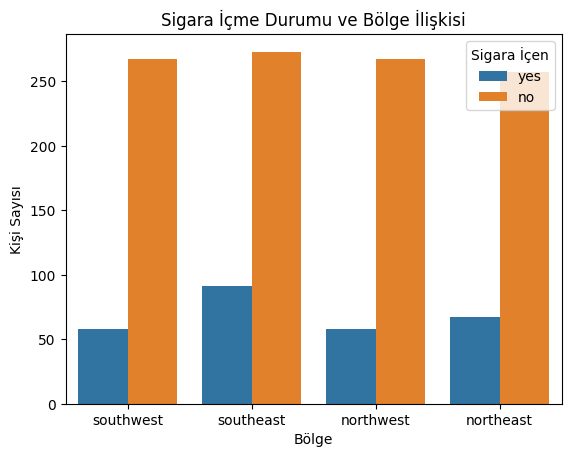

In [13]:
sns.countplot(x="region", hue="smoker", data=data)
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.title('Sigara İçme Durumu ve Bölge İlişkisi')
plt.legend(title="Sigara İçen")
plt.show()

In general, the number of non-smokers is higher in all regions. The region with the highest number of smokers is the southeast.

**Relationship between “bmi” and “sex”**


<Axes: xlabel='sex', ylabel='bmi'>

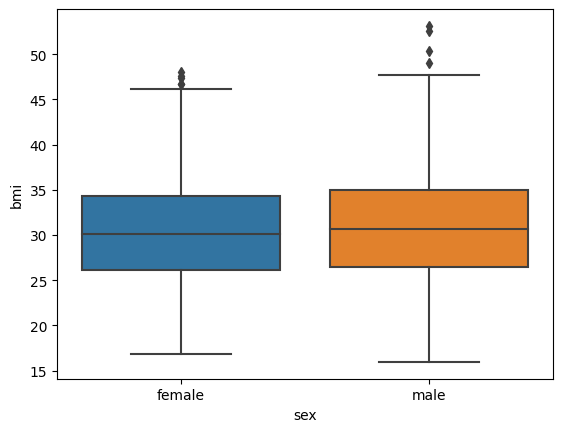

In [14]:
sns.boxplot(x = 'sex',y = 'bmi',data = data)

In [15]:
data.groupby("sex")["bmi"].mean().head()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

 **Find the "region" with the most "children"**

In [16]:
data.groupby("region")["children"].sum().head().sort_values(ascending=False)

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

The region with the highest number of people with children is southeast.

**Relationship between “age” and “bmi"**

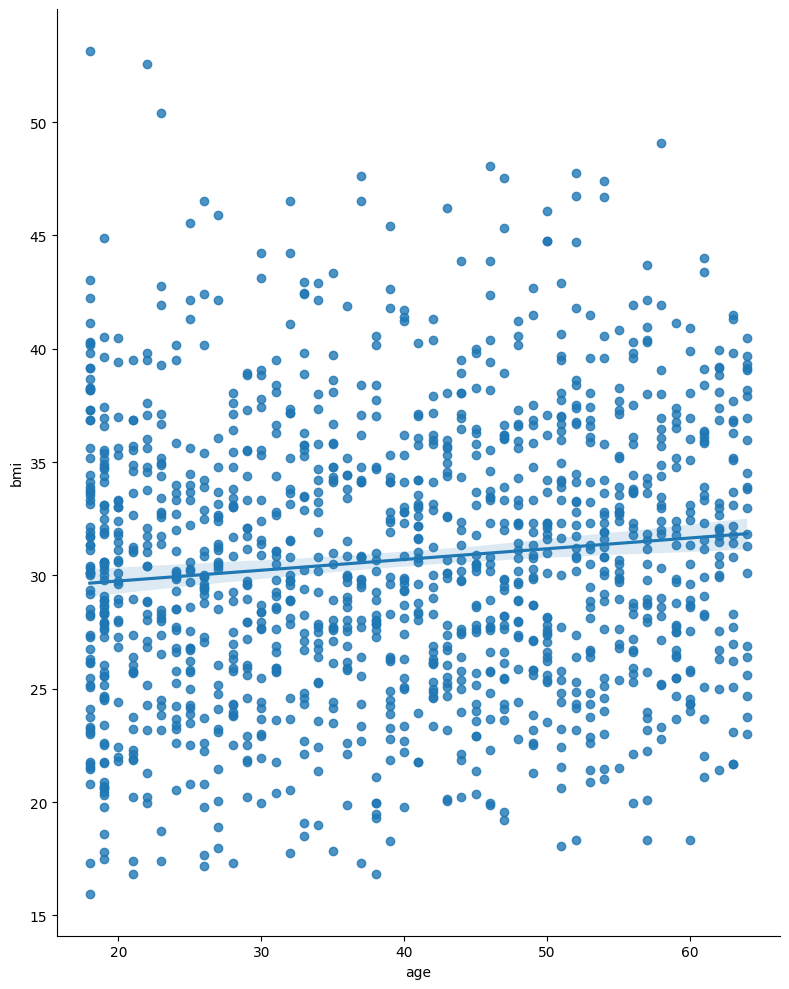

In [17]:
sns.lmplot(x="age", y="bmi", height=10, aspect=0.8,data = data)

We observe an increase in body mass index with increasing age.

**Relationship between “bmi” and “children"**

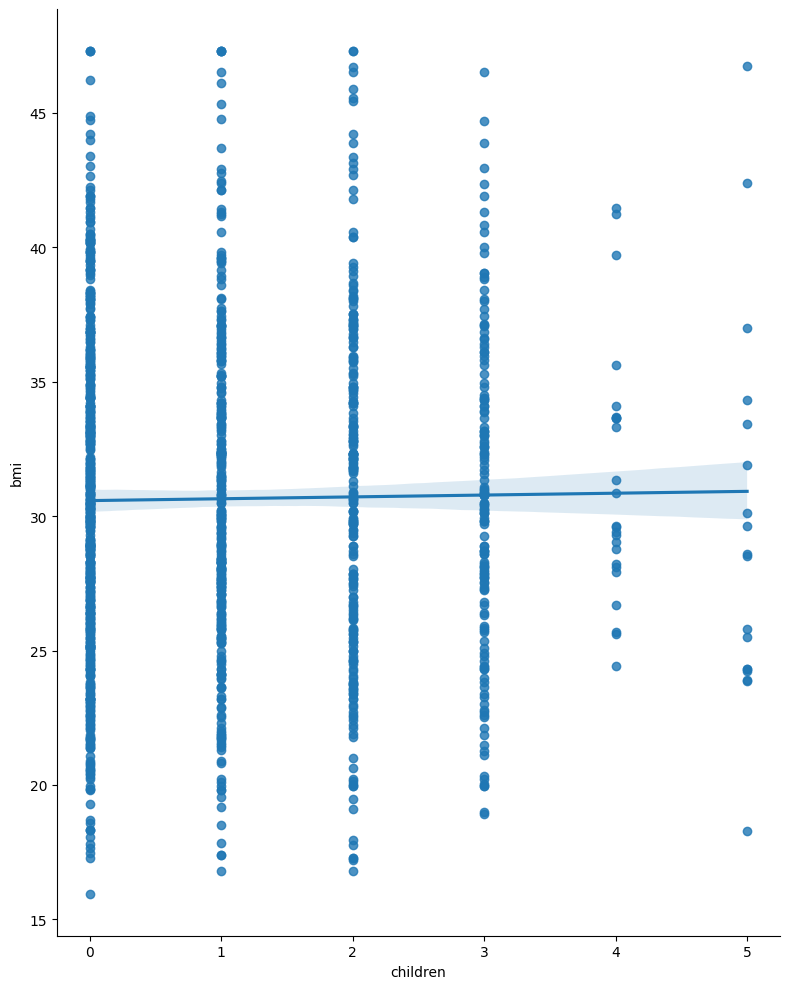

In [43]:
sns.lmplot(x="children", y="bmi", height=10, aspect=0.8,data = data)

**Relationship between “bmi” and “charges”**

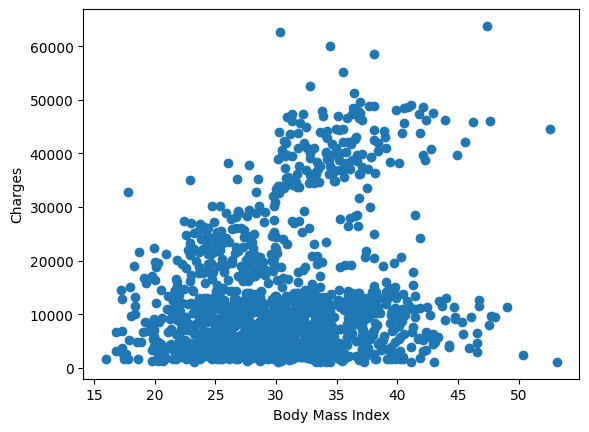

In [18]:
plt.scatter(x=data['bmi'], y=data["charges"])
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()

When we look at the relationship between body mass index and charges, we see that as body mass index increases, health charges increase.

**Relationship between “region”, “smoker” and “bmi” using bar plot**


<Axes: xlabel='region', ylabel='bmi'>

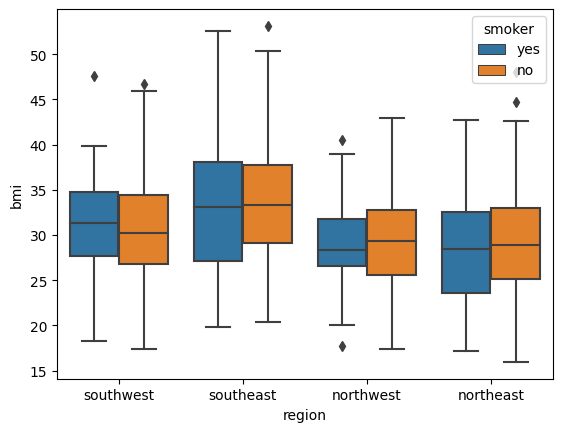

In [19]:
sns.boxplot(x = 'region',y = 'bmi', hue ='smoker',data = data)

The region with the highest body mass index of smokers is the southeast.

**Outliers**


In [20]:
a = ['bmi','charges','age']

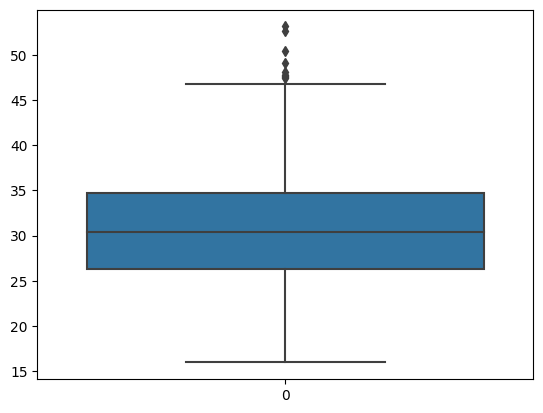

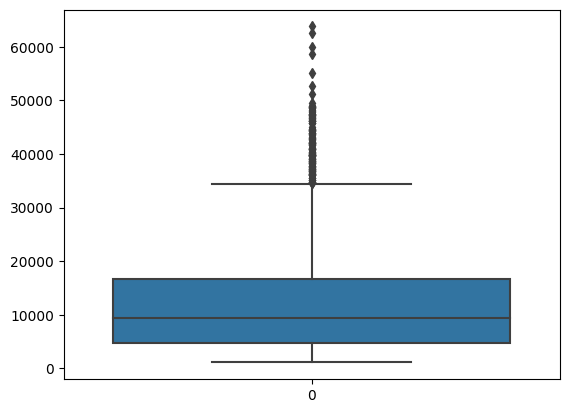

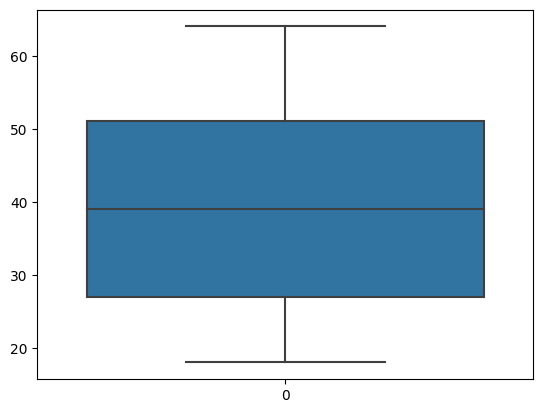

In [21]:
for i in range(len(a)):
  plt.figure()
  sns.boxplot(data[a[i]])
  plt.show()

We observe that there are outliers in the Bmi variable. We also observe that there are outliers in the Charges variable. There are no outliers in the Age variable.

In [22]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data[(data['charges'] < lower_limit) | (data['charges'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [23]:
Q1 = 4740.28715
Q3 = 16639.912515
IQR = 11899.625365

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["charges"] = np.clip(data["charges"], lower_bound, upper_bound)


In [24]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


data["bmi"] = np.clip(data["bmi"], lower_limit, upper_limit)

We have removed our outliers from both variables, now let's check them.

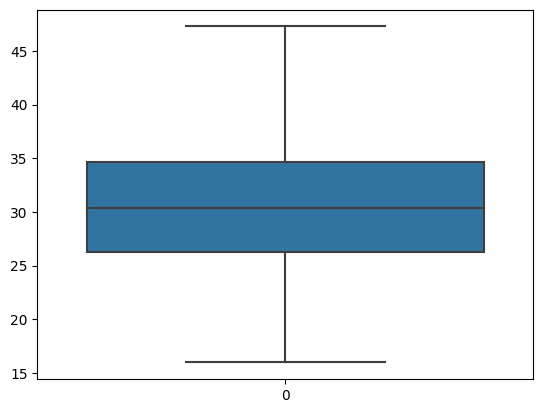

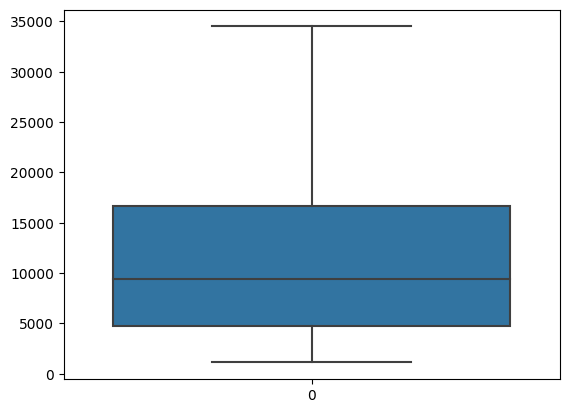

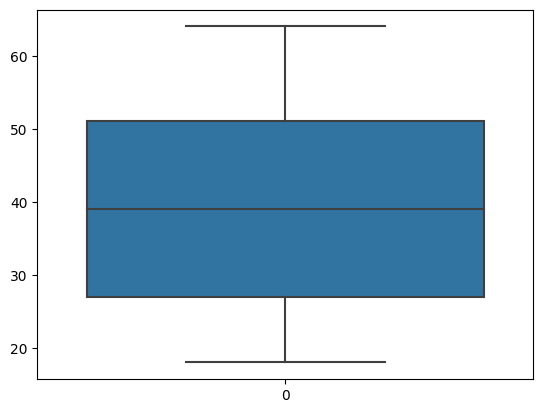

In [25]:
for i in range(len(a)):
  plt.figure()
  sns.boxplot(data[a[i]])
  plt.show()

We observe that our outliers are gone.

### **Label Encoding**

In [26]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [27]:
h = LabelEncoder()
y = h.fit_transform(data["sex"])
(data["sex"]) = y

In [28]:
h = LabelEncoder()
y = h.fit_transform(data["smoker"])
(data["smoker"]) = y

In [29]:
region_encoded = pd.get_dummies(data['region'], prefix='region', drop_first=True)
data1 = pd.concat([data, region_encoded], axis=1)
data1 = data1.drop('region', axis=1)


In [30]:
data1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


**Splitting the data set into training and test sets**

In [31]:
X = data1.drop(["smoker"],axis=1)
y = data1["smoker"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (1338, 8) (1338,) 
Training set  --->  (1070, 8) (1070,) 
Testing set   --->  (268, 8)  (268,)


**Normalization**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
display(X_train_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)
display(X_test_std.describe())

                               Standardardization on Training set                               


,age,sex,bmi,children,charges,region_northwest,region_southeast,region_southwest
count,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03
mean,-1.992176e-16,-6.308557e-17,3.104474e-16,-2.324205e-17,-3.320293e-18,-4.648410e-17,-3.320293e-17,7.304645e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-1.024602e+00,-2.428927e+00,-9.111921e-01,-1.134858e+00,-5.607997e-01,-5.996611e-01,-5.723141e-01
25%,-8.784157e-01,-1.024602e+00,-7.232890e-01,-9.111921e-01,-7.604593e-01,-5.607997e-01,-5.996611e-01,-5.723141e-01
50%,1.016470e-02,9.759891e-01,-5.651695e-02,-8.842793e-02,-2.966224e-01,-5.607997e-01,-5.996611e-01,-5.723141e-01
75%,8.276587e-01,9.759891e-01,6.570789e-01,7.343363e-01,4.144581e-01,-5.607997e-01,1.667609e+00,-5.723141e-01
max,1.751782e+00,9.759891e-01,2.787045e+00,3.202629e+00,2.173781e+00,1.783168e+00,1.667609e+00,1.747292e+00



                                Standardardization on Testing set                                


,age,sex,bmi,children,charges,region_northwest,region_southeast,region_southwest
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,-0.053230,-0.069096,0.083585,-0.051588,-0.043315,0.042684,0.085596,-0.044344
std,0.992638,1.001162,1.038622,0.957308,1.035060,1.026785,1.043142,0.974409
min,-1.518194,-1.024602,-2.286582,-0.911192,-1.133903,-0.560800,-0.599661,-0.572314
25%,-0.949502,-1.024602,-0.645665,-0.911192,-0.820839,-0.560800,-0.599661,-0.572314
50%,-0.096465,-1.024602,0.038379,-0.088428,-0.404462,-0.560800,-0.599661,-0.572314
75%,0.756572,0.975989,0.774243,0.734336,0.376894,1.783168,1.667609,-0.572314
max,1.751782,0.975989,2.787045,3.202629,2.173781,1.783168,1.667609,1.747292


### **Model Building**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### **Logistic Regression**

In [36]:
logistic_classifier_model = LogisticRegression()
logistic_classifier_model.fit(X_train, y_train)
logistic_pred = logistic_classifier_model.predict(X_test)
logistic_report = classification_report(y_test, logistic_pred)

### **Desicion Tree**

In [37]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
tree_pred = decision_tree_model.predict(X_test)
tree_report = classification_report(y_test, tree_pred)


### **Naive Bayes**

In [38]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

### **Random Forest**

In [39]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_report = classification_report(y_test, random_forest_pred)

### **Comparing the Performances**

In [40]:
print('***** Logistic Regression *****')
print(logistic_report)

print('***** Decision Tree *****')
print(tree_report)

print('***** Naive Bayes *****')
print(naive_bayes_report)

print('***** Random Forest *****')
print(random_forest_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       214
           1       0.87      0.96      0.91        54

    accuracy                           0.96       268
   macro avg       0.93      0.96      0.94       268
weighted avg       0.97      0.96      0.96       268

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       214
           1       0.89      0.93      0.91        54

    accuracy                           0.96       268
   macro avg       0.94      0.95      0.94       268
weighted avg       0.96      0.96      0.96       268

***** Naive Bayes *****
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       214
           1       0.81      0.85      0.83        54

    accuracy                           0.93       268
   macro avg       0.88      0.90      0.89   

I preferred the logistic regression because it had higher accuracy values.